IMPORTAZIONE LIBRERIE

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

CAMBIO PATH PER ANALISI RISPETTO AL LOG DI VOLO CONSIDERATO

In [2]:
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\M6\FAULT_M6_5


VOLO m6 FAULT 5%

In [3]:
rcou_m6_fault5 = pd.read_csv("RCOU.csv")
rcou_m6_fault5 = rcou_m6_fault5.drop(['LineNo','C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8'], axis=1)

rcou_m6_fault5 = rcou_m6_fault5[((rcou_m6_fault5['C9'] >= 1400) & (rcou_m6_fault5['C10'] >= 1400) & (rcou_m6_fault5['C11'] >= 1400) & (rcou_m6_fault5['C12'] >= 1400) & (rcou_m6_fault5['C13'] >= 1400) & (rcou_m6_fault5['C14']>= 1400))]

pd.set_option('display.max_rows',700)
display(rcou_m6_fault5)

,TimeUS,C9,C10,C11,C12,C13,C14
2005,67775465,1490,1453,1495,1447,1507,1433
2008,67806882,1459,1518,1538,1437,1505,1473
2009,67817082,1536,1452,1500,1490,1535,1452
2010,67830131,1529,1474,1554,1446,1575,1420
2011,67840930,1531,1484,1572,1437,1589,1415
...,...,...,...,...,...,...,...
7202,125231886,1603,1423,1592,1438,1505,1533
7203,125242251,1595,1433,1596,1431,1504,1534
7204,125252552,1615,1402,1590,1435,1525,1510
7206,125280870,1598,1400,1542,1470,1471,1540


In [4]:
xkf1_m6_fault5 = pd.read_csv("XKF1_0.csv")
xkf1_m6_fault5 = xkf1_m6_fault5.drop(['LineNo','C','VN','VE','VD','dPD','PN','PE','PD','GX','GY','GZ','OH'], axis=1)
xkf1_m6_fault5 = xkf1_m6_fault5[((xkf1_m6_fault5['TimeUS'] >= 67775465) & (xkf1_m6_fault5['TimeUS'] <= 125291537))]
print(xkf1_m6_fault5)

         TimeUS  Roll  Pitch    Yaw
2008   67783485  0.65  -1.31  28.85
2009   67794341  0.65  -1.34  28.86
2010   67804587  0.70  -1.38  28.87
2011   67814763  0.83  -1.39  28.85
2012   67827986  0.90  -1.37  28.85
...         ...   ...    ...    ...
7208  125239951 -2.18   2.35  12.74
7209  125250367 -2.21   2.22  12.64
7210  125261258 -2.23   2.11  12.53
7211  125278300 -2.21   2.07  12.35
7212  125289227 -2.17   1.91  12.25

[5205 rows x 4 columns]


In [5]:
att_m6_fault5 = pd.read_csv("ATT.csv")
att_m6_fault5 = att_m6_fault5.drop(['LineNo','ErrRP', 'ErrYaw', 'AEKF'], axis=1)
att_m6_fault5 = att_m6_fault5[((att_m6_fault5['TimeUS'] >= 67775465) & (att_m6_fault5['TimeUS'] <= 125291537))]
print(att_m6_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
2008   67785306     0.06  0.65      0.54  -1.31   28.71  28.85
2009   67795768     0.05  0.65      0.56  -1.34   28.71  28.86
2010   67806110     0.05  0.70      0.57  -1.38   28.71  28.87
2011   67816113     0.04  0.83      0.59  -1.39   28.71  28.85
2012   67829274     0.03  0.90      0.61  -1.37   28.71  28.85
...         ...      ...   ...       ...    ...     ...    ...
7208  125241483    -1.37 -2.18      1.22   2.35   12.32  12.74
7209  125251897    -1.33 -2.21      1.22   2.22   12.32  12.64
7210  125262776    -1.30 -2.23      1.23   2.11   12.32  12.53
7211  125280024    -1.27 -2.21      1.24   2.07   12.32  12.35
7212  125290917    -1.27 -2.17      1.24   1.91   12.32  12.25

[5205 rows x 7 columns]


In [6]:
att_m6_fault5 = pd.merge_asof(att_m6_fault5,xkf1_m6_fault5, on="TimeUS", by=["Roll","Pitch","Yaw"], tolerance=100000)
print(att_m6_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw
0      67785306     0.06  0.65      0.54  -1.31   28.71  28.85
1      67795768     0.05  0.65      0.56  -1.34   28.71  28.86
2      67806110     0.05  0.70      0.57  -1.38   28.71  28.87
3      67816113     0.04  0.83      0.59  -1.39   28.71  28.85
4      67829274     0.03  0.90      0.61  -1.37   28.71  28.85
...         ...      ...   ...       ...    ...     ...    ...
5200  125241483    -1.37 -2.18      1.22   2.35   12.32  12.74
5201  125251897    -1.33 -2.21      1.22   2.22   12.32  12.64
5202  125262776    -1.30 -2.23      1.23   2.11   12.32  12.53
5203  125280024    -1.27 -2.21      1.24   2.07   12.32  12.35
5204  125290917    -1.27 -2.17      1.24   1.91   12.32  12.25

[5205 rows x 7 columns]


In [7]:
esc_5_m6_fault5 = pd.read_csv("ESC_5.csv")
esc_5_m6_fault5 = esc_5_m6_fault5.drop(['LineNo','Instance', 'RawRPM', 'Volt', 'Temp', 'CTot', 'MotTemp', 'Err'], axis=1)
esc_5_m6_fault5 = esc_5_m6_fault5[((esc_5_m6_fault5['TimeUS'] >= 67775465) & (esc_5_m6_fault5['TimeUS'] <= 125291537))]
print(esc_5_m6_fault5)

        TimeUS   RPM  Curr
191   67843037  4223  2.79
192   68060350  4818  4.35
193   68171090  5805  3.97
194   68285113  6018  3.45
195   68382063  5912  3.14
196   68490310  5873  3.47
197   68597272  5971  3.82
198   68714215  6021  4.19
199   68821454  6180  4.08
200   68929322  6108  3.80
201   69034368  6270  4.54
202   69144919  6259  4.50
203   69261732  6290  3.68
204   69369883  6179  2.95
205   69693981  5964  3.18
206   69798484  5751  3.14
207   69914326  5650  3.32
208   70020106  5780  3.31
209   70132114  5948  3.41
210   70239317  5849  3.77
211   70353079  5955  3.86
212   70465566  6141  3.99
213   70578021  6257  4.30
214   70686246  6276  4.40
215   70797764  6445  4.72
216   71009881  6478  3.56
217   71123278  6088  3.28
218   71229582  5973  3.18
219   71335601  5808  3.39
220   71545767  5769  3.50
221   71767951  5658  3.49
222   71987373  5728  3.07
223   72096138  5722  3.04
224   72310237  5642  3.40
225   72426229  5772  3.59
226   72526512  5936  3.01
2

In [8]:
imu_2_m6_fault5 = pd.read_csv("IMU_2.csv")
imu_2_m6_fault5 = imu_2_m6_fault5.drop(['LineNo','I', 'EG', 'EA', 'T', 'GH', 'AH', 'GHz', 'AHz'], axis=1)
imu_2_m6_fault5 = imu_2_m6_fault5[((imu_2_m6_fault5['TimeUS'] >= 67775465) & (imu_2_m6_fault5['TimeUS'] <= 125291537))]
print(imu_2_m6_fault5)

          TimeUS      GyrX      GyrY      GyrZ      AccX      AccY       AccZ
7968    67777288  0.376552 -0.062188 -0.014475 -0.077492 -0.075057  -9.782226
7969    67779753  0.043898 -0.050621 -0.002955 -0.060587  0.061782  -9.894503
7970    67782547 -0.208109 -0.064323  0.015033 -0.094013  0.194497  -9.930532
7971    67785133 -0.204831 -0.045784  0.018565 -0.103949  0.282304  -9.809524
7972    67787759  0.283983 -0.032165 -0.007995 -0.126404  0.228490  -9.910168
...          ...       ...       ...       ...       ...       ...        ...
27800  125279697  0.096583 -0.123274 -0.238266  0.430086  1.049078 -11.107080
27801  125282942  0.095759 -0.170175 -0.253205  0.245136  1.039961 -11.430670
27802  125285438  0.096495 -0.183014 -0.224589  0.237217  1.025587 -11.439460
27803  125287925  0.066669 -0.244425 -0.175862  0.212578  1.012558 -11.530780
27804  125290514  0.054235 -0.235280 -0.159038  0.229523  1.031899 -11.525000

[19837 rows x 7 columns]


In [9]:
m6_fault5 = pd.merge_asof(att_m6_fault5, imu_2_m6_fault5, on="TimeUS",  tolerance= 100000)
print(m6_fault5)

         TimeUS  DesRoll  Roll  DesPitch  Pitch  DesYaw    Yaw      GyrX  \
0      67785306     0.06  0.65      0.54  -1.31   28.71  28.85 -0.204831   
1      67795768     0.05  0.65      0.56  -1.34   28.71  28.86 -0.139614   
2      67806110     0.05  0.70      0.57  -1.38   28.71  28.87 -0.049490   
3      67816113     0.04  0.83      0.59  -1.39   28.71  28.85  0.083332   
4      67829274     0.03  0.90      0.61  -1.37   28.71  28.85  0.104610   
...         ...      ...   ...       ...    ...     ...    ...       ...   
5200  125241483    -1.37 -2.18      1.22   2.35   12.32  12.74 -0.014259   
5201  125251897    -1.33 -2.21      1.22   2.22   12.32  12.64  0.002874   
5202  125262776    -1.30 -2.23      1.23   2.11   12.32  12.53  0.040623   
5203  125280024    -1.27 -2.21      1.24   2.07   12.32  12.35  0.096583   
5204  125290917    -1.27 -2.17      1.24   1.91   12.32  12.25  0.054235   

          GyrY      GyrZ      AccX      AccY       AccZ  
0    -0.045784  0.018565 -0.1

In [10]:
m6_fault5 = pd.merge_asof(esc_5_m6_fault5, m6_fault5, on="TimeUS",  tolerance= 100000)
print(m6_fault5)

        TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
0     67843037  4223  2.79     0.02   0.94      0.62  -1.41   28.71  28.84   
1     68060350  4818  4.35    -0.48   1.45      1.16  -0.17   28.70  30.04   
2     68171090  5805  3.97    -1.10   1.64      1.59   1.23   28.70  31.16   
3     68285113  6018  3.45    -1.88   1.28      1.85   1.80   28.69  32.22   
4     68382063  5912  3.14    -3.39   0.14      1.75   2.05   28.70  33.07   
5     68490310  5873  3.47    -5.85  -1.67      1.74   1.87   28.65  34.08   
6     68597272  5971  3.82    -7.64  -3.94      1.52   1.75   27.73  35.02   
7     68714215  6021  4.19    -8.86  -6.36      1.20   1.58   26.32  35.66   
8     68821454  6180  4.08    -9.35  -7.38      0.87   1.32   24.74  35.68   
9     68929322  6108  3.80    -9.51  -7.34      0.74   1.09   22.29  34.85   
10    69034368  6270  4.54    -9.23  -7.24      0.42   1.49   18.61  33.15   
11    69144919  6259  4.50    -8.86  -6.69      0.20   2.03   15

In [11]:
m6_fault5["TimeUS"] = m6_fault5["TimeUS"] - m6_fault5.iloc[0]["TimeUS"]
m6_fault5["TimeUS"] = m6_fault5["TimeUS"].astype(int)
m6_fault5["Guasto"] = 1
print(m6_fault5)

       TimeUS   RPM  Curr  DesRoll   Roll  DesPitch  Pitch  DesYaw    Yaw  \
0           0  4223  2.79     0.02   0.94      0.62  -1.41   28.71  28.84   
1      217313  4818  4.35    -0.48   1.45      1.16  -0.17   28.70  30.04   
2      328053  5805  3.97    -1.10   1.64      1.59   1.23   28.70  31.16   
3      442076  6018  3.45    -1.88   1.28      1.85   1.80   28.69  32.22   
4      539026  5912  3.14    -3.39   0.14      1.75   2.05   28.70  33.07   
5      647273  5873  3.47    -5.85  -1.67      1.74   1.87   28.65  34.08   
6      754235  5971  3.82    -7.64  -3.94      1.52   1.75   27.73  35.02   
7      871178  6021  4.19    -8.86  -6.36      1.20   1.58   26.32  35.66   
8      978417  6180  4.08    -9.35  -7.38      0.87   1.32   24.74  35.68   
9     1086285  6108  3.80    -9.51  -7.34      0.74   1.09   22.29  34.85   
10    1191331  6270  4.54    -9.23  -7.24      0.42   1.49   18.61  33.15   
11    1301882  6259  4.50    -8.86  -6.69      0.20   2.03   15.42  30.32   

In [12]:
path_file = path_file.replace(r"M6\FAULT_M6_5", "")
os.chdir(path_file)
m6_fault5.to_csv('m6_fault5.csv', index=False)
print(path_file)

d:\GitHub\ProgettoManutenzionePreventiva\


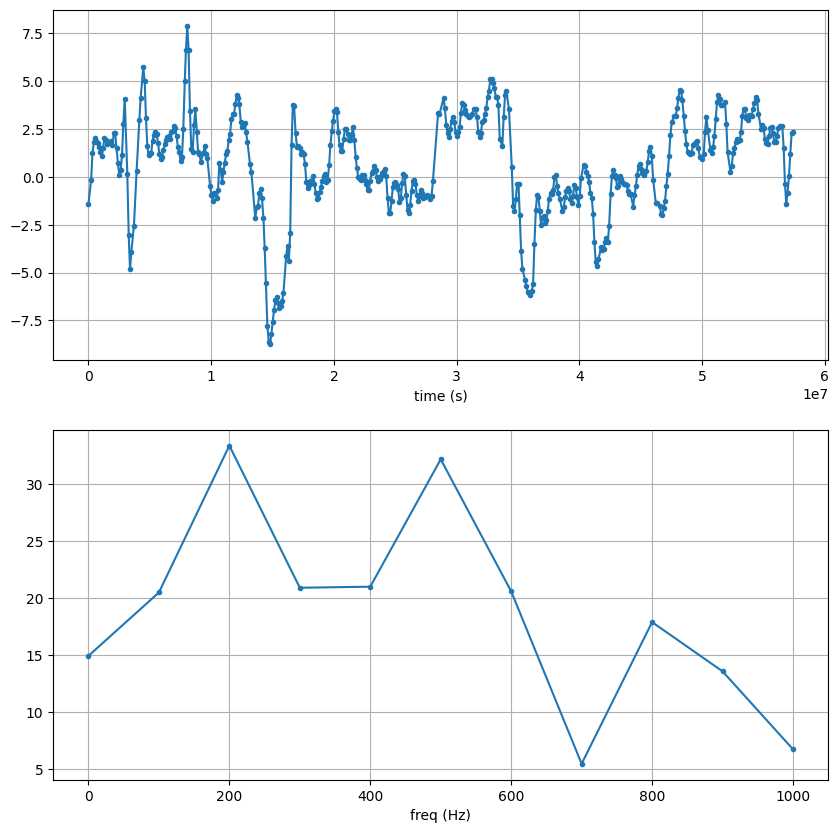

In [13]:
t = m6_fault5["TimeUS"]
y = m6_fault5["Pitch"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

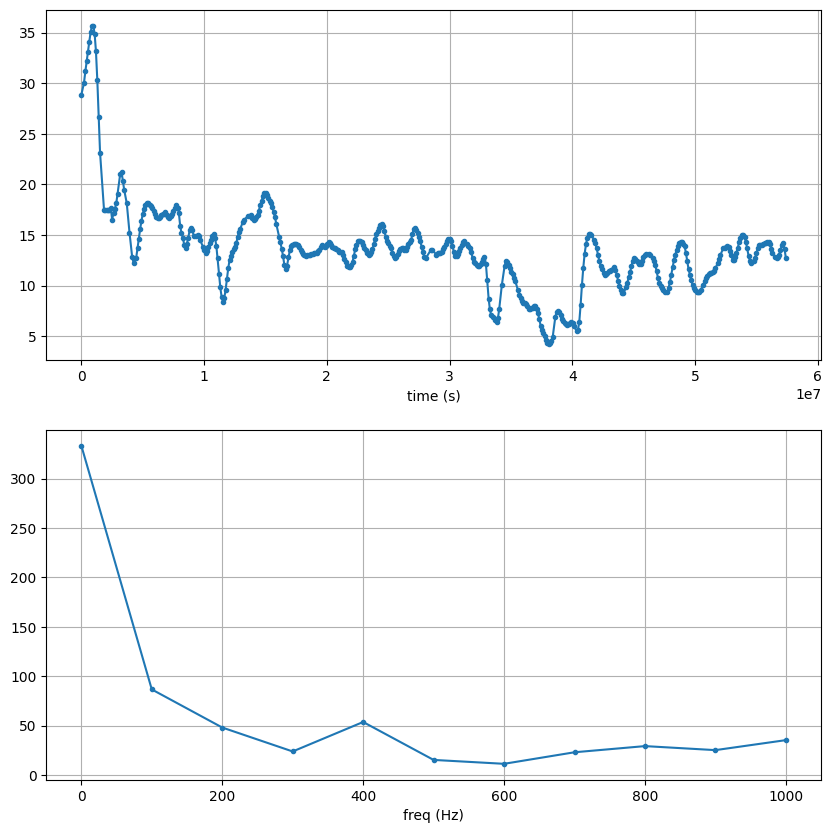

In [14]:
t = m6_fault5["TimeUS"]
y = m6_fault5["Yaw"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

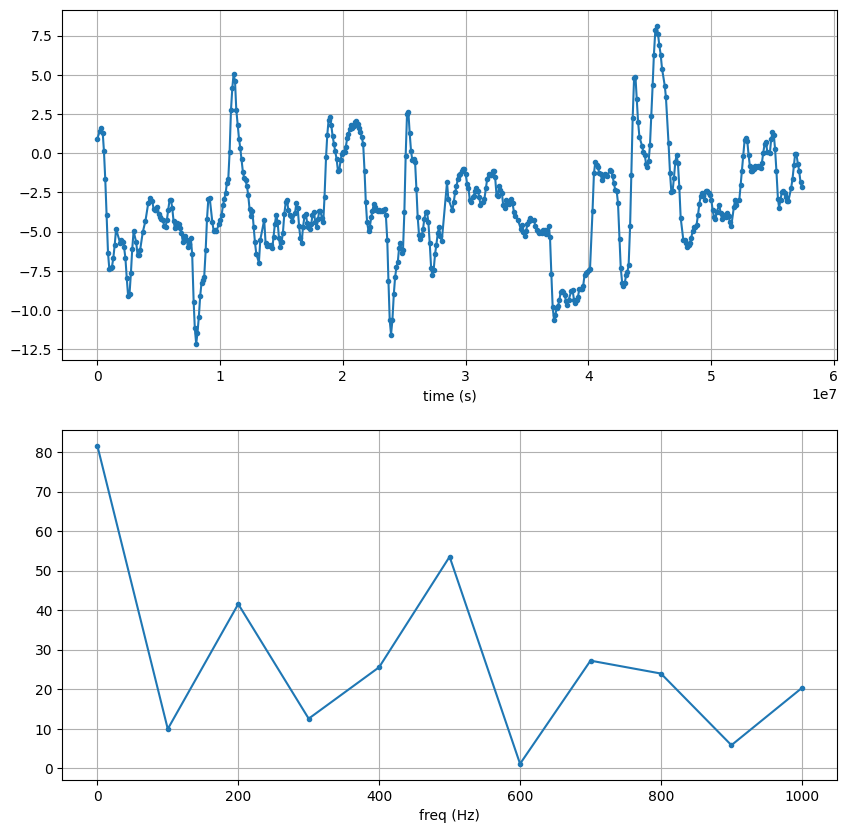

In [15]:
t = m6_fault5["TimeUS"]
y = m6_fault5["Roll"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

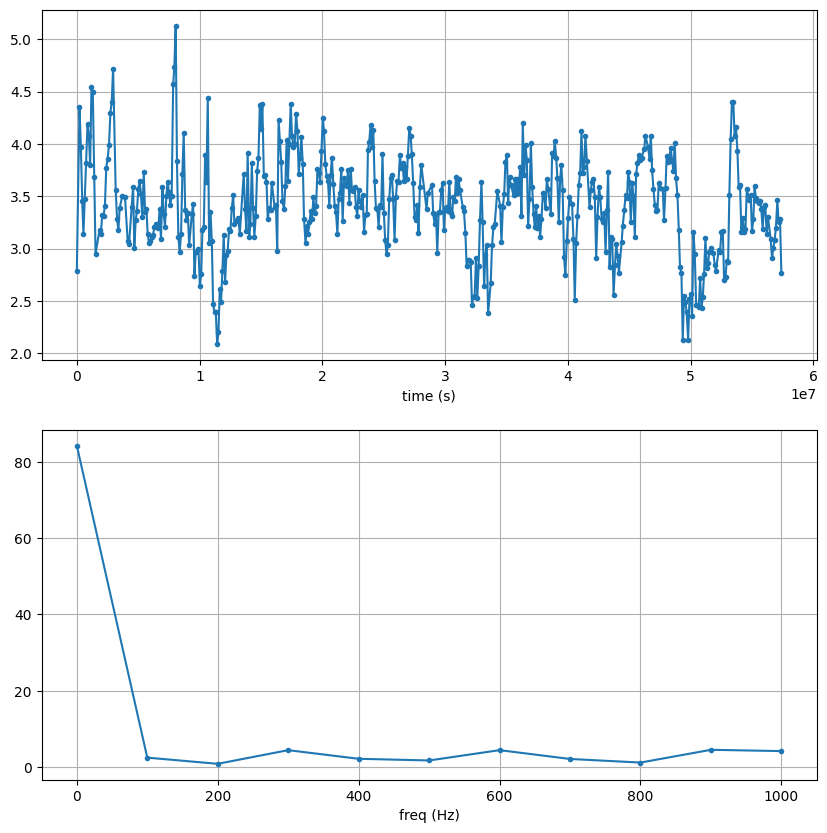

In [16]:
t = m6_fault5["TimeUS"]
y = m6_fault5["Curr"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

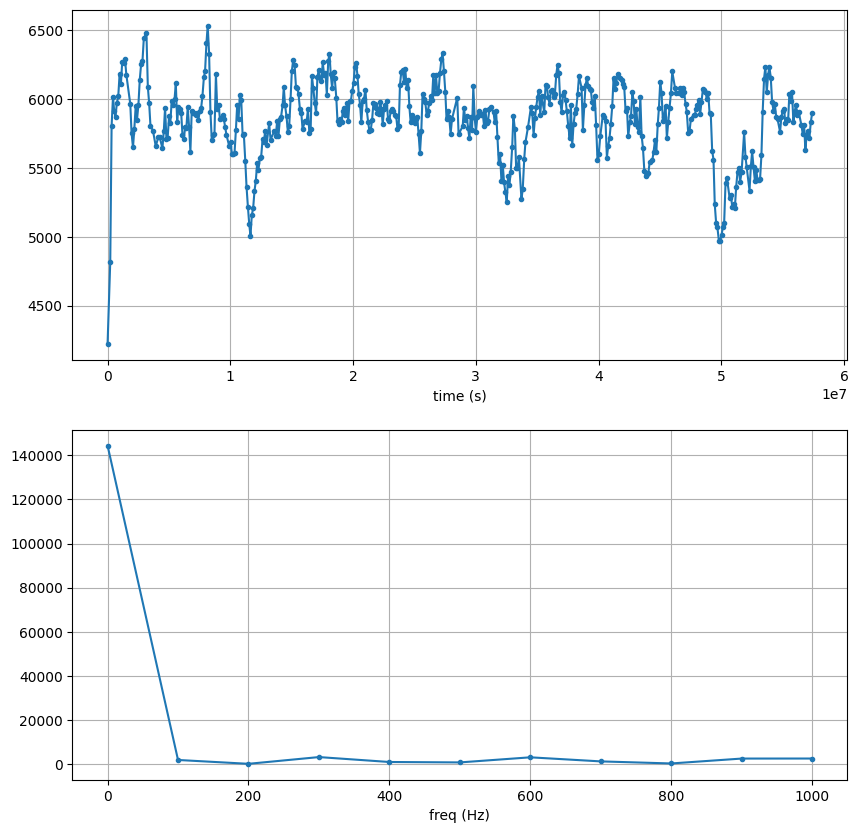

In [17]:
t = m6_fault5["TimeUS"]
y = m6_fault5["RPM"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

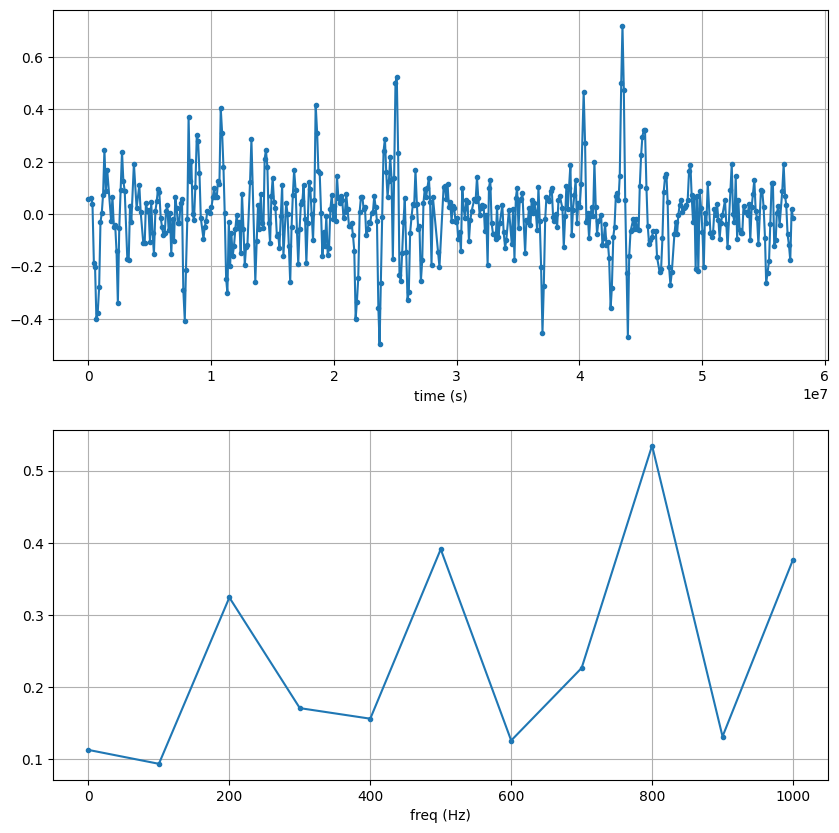

In [18]:
t = m6_fault5["TimeUS"]
y = m6_fault5["GyrX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

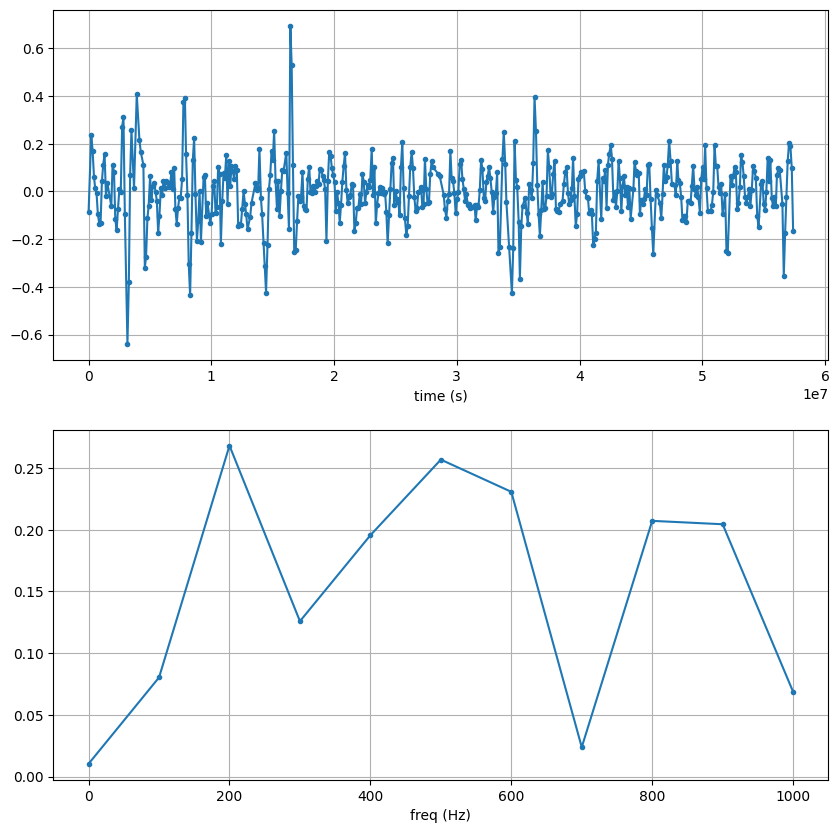

In [19]:
t = m6_fault5["TimeUS"]
y = m6_fault5["GyrY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

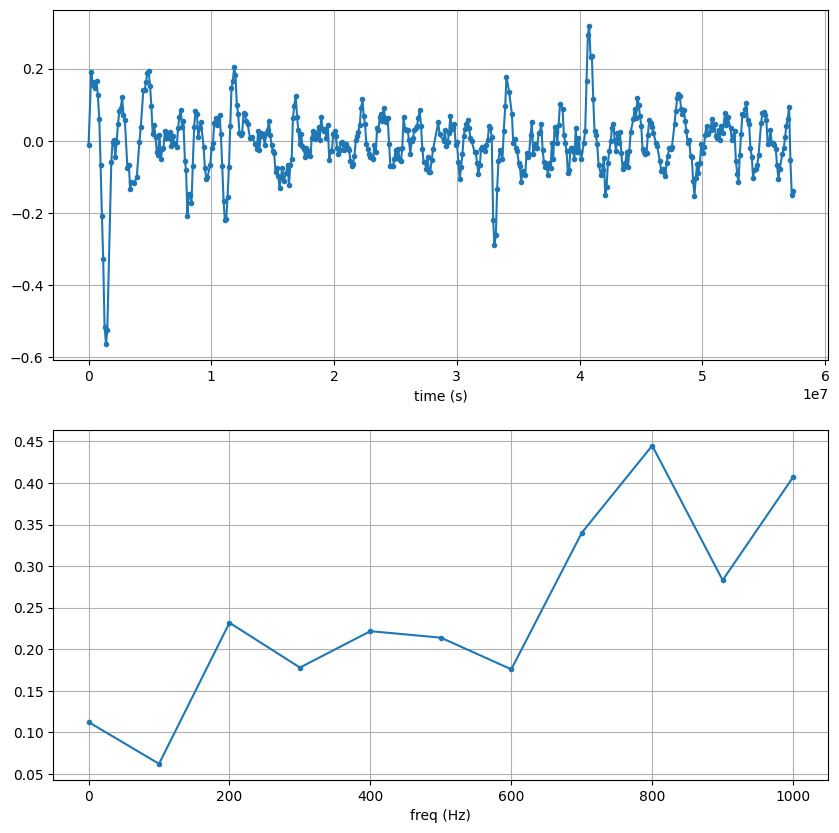

In [20]:
t = m6_fault5["TimeUS"]
y = m6_fault5["GyrZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

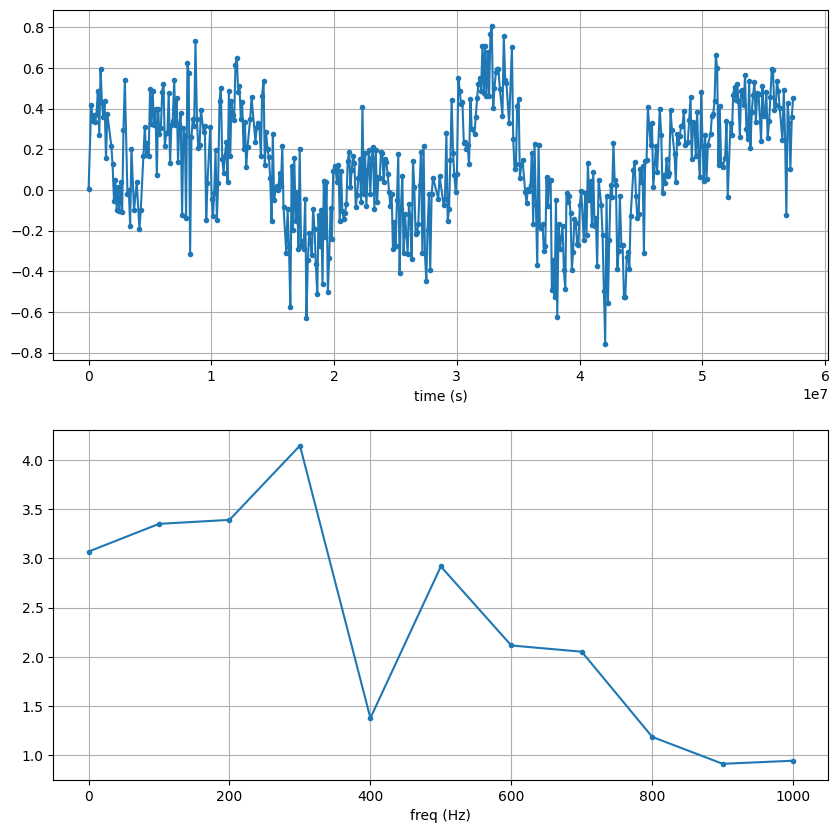

In [21]:
t = m6_fault5["TimeUS"]
y = m6_fault5["AccX"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

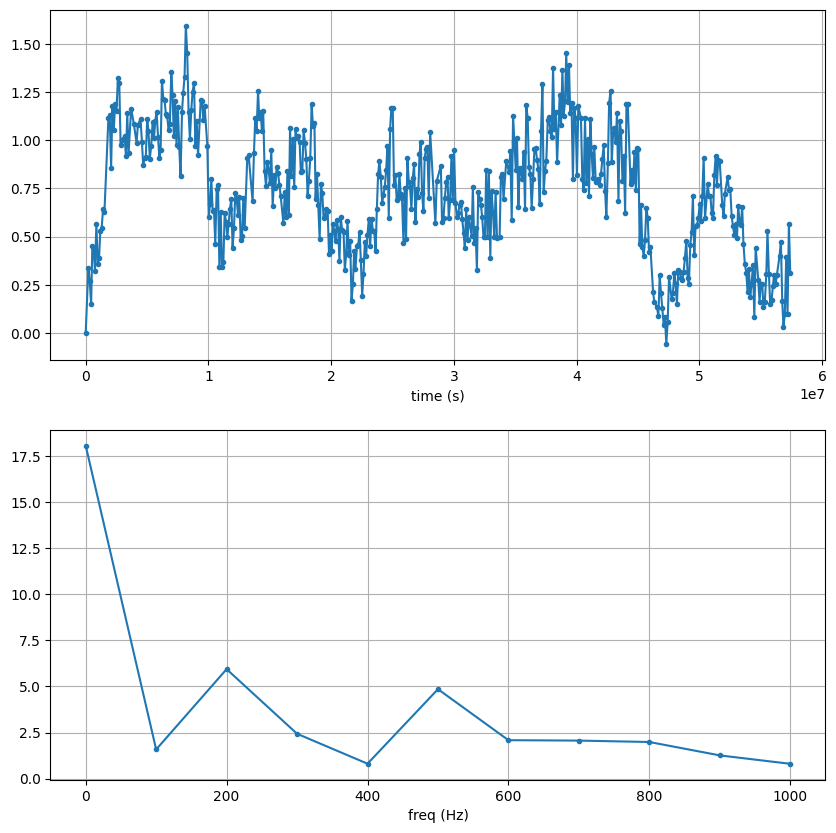

In [22]:
t = m6_fault5["TimeUS"]
y = m6_fault5["AccY"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()

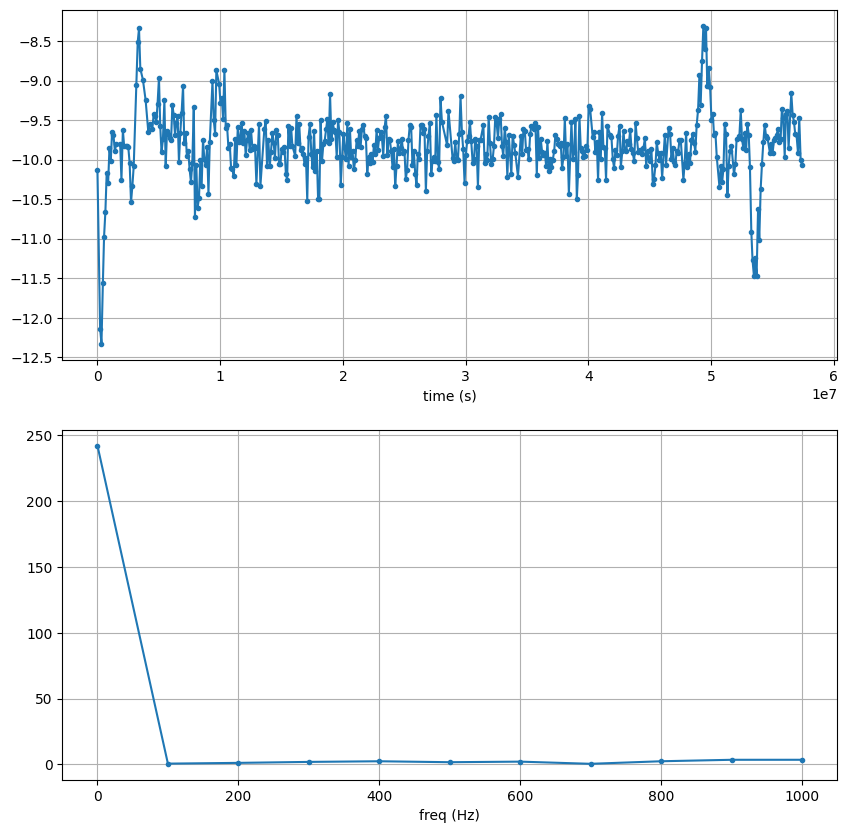

In [23]:
t = m6_fault5["TimeUS"]
y = m6_fault5["AccZ"]

Fs = 2000
f0 = 100

N = int(Fs/f0)
fstep = Fs / N
f = np.linspace(0,(N-1)*fstep,N)

X = np.fft.fft(y.values)
X_mag = np.abs(X) / N

f_plot = f[0:int(N/2+1)]
X_mag_plot = 2 * X_mag[0:int(N/2+1)]
X_mag_plot[0] = X_mag_plot[0] / 2


fig, [ax1, ax2] = plt.subplots(nrows=2,ncols=1,figsize=(10, 10))
ax1.plot(t, y, '.-')
ax2.plot(f_plot, X_mag_plot, '.-')
ax1.set_xlabel("time (s)")
ax2.set_xlabel("freq (Hz)")
ax1.grid()
ax2.grid()

#ax1.set_xlim(0, t[-1])
#ax2.set_xlim(0, f_plot[-1])

#plt.tight_layout()
plt.show()